# 02 Add sinusoidal signal to pure DRW. 

Amplitude and period are fraction of SFinf, tau. 

The grid of SFinf, tau : 

In [3]:
import os 
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

t = np.loadtxt('t_true.txt')
sfinf_grid = np.linspace(0.01, 0.25, 100)

# instead of doing linear space for tau,
# we do logarithmic space, just like in Fig.2
# tau_grid = np.linspace(10,1000, 100) 

rho_min, rho_max,  n_rho = 0.001, 15, 100
rho_grid = np.logspace(np.log10(rho_min), np.log10(rho_max), n_rho)
t_exp = max(t) - min(t) # days 
tau_grid = rho_grid * t_exp

Illustrate for few values:

sfinf=0.01, tau=9785.634680148629, f_amp=1.2, f_period=0.1
sfinf=0.01, tau=9785.634680148629, f_amp=1.2, f_period=0.3111111111111111
sfinf=0.01, tau=9785.634680148629, f_amp=1.2, f_period=0.5222222222222223


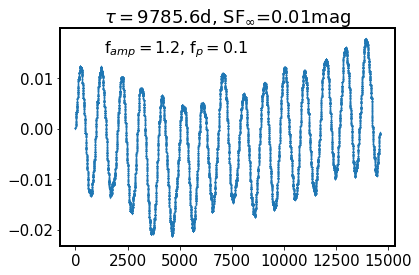

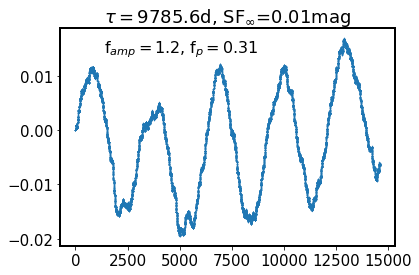

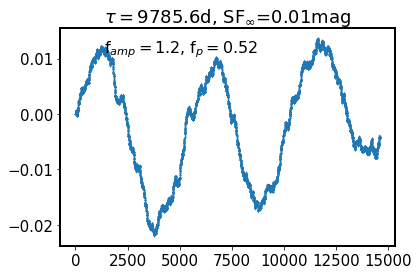

In [59]:
f_amp_grid = np.linspace(0.1, 1.2,10)
f_period_grid = np.linspace(0.1, 2, 10)

i=0 # sfgrid
j=67 # taugrid 
k=3 # realization
lc = np.load(f'LC_{str(i).zfill(3)}_{str(j).zfill(3)}.npy', allow_pickle=True).item()
sfinf = sfinf_grid[i]
tau = tau_grid[j]

y_drw = lc[k]
#for f_amp in f_amp_grid:
f_amp = 1.2
amp = f_amp*sfinf
for f_period in f_period_grid[:3]:
#f_period = 1
    period = f_period * tau 
    print(f'sfinf={sfinf}, tau={tau}, f_amp={f_amp}, f_period={f_period}')
    omega = 2*np.pi / period
    y_sin = amp*np.sin(omega*t)
    y_tot = y_drw +y_sin
    fig,ax = plt.subplots()
    ax.scatter(t,y_tot,s=0.1)
    ax.text(0.13,0.89, r'f$_{amp}=$'+str(f_amp)[:4]+r', f$_{p}=$'+str(f_period)[:4],
           transform=ax.transAxes, fontsize=16)
    ax.set_title(r'$\tau = $'+str(tau)[:6]+'d, '+r'SF$_{\infty}$='+str(sfinf)+'mag')

Examples of large amplitude relative to SFinf. 

sfinf=0.01, tau=9785.634680148629, f_amp=0.1, f_period=0.1
sfinf=0.01, tau=9785.634680148629, f_amp=0.1, f_period=0.3111111111111111
sfinf=0.01, tau=9785.634680148629, f_amp=0.1, f_period=0.5222222222222223


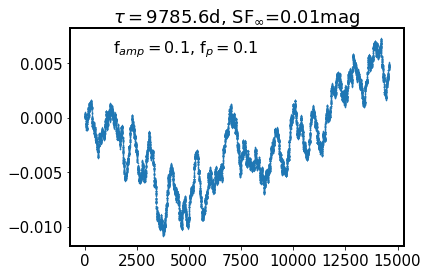

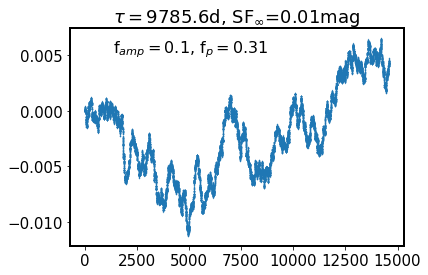

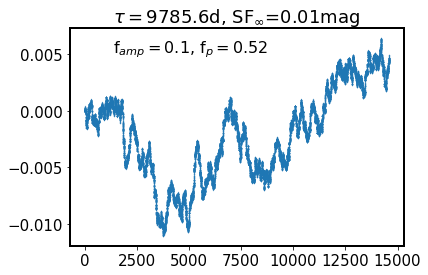

In [62]:
f_amp_grid = np.linspace(0.1, 1.2,10)
f_period_grid = np.linspace(0.1, 2, 10)

i=0 # sfgrid
j=67 # taugrid 
k=3 # realization
lc = np.load(f'LC_{str(i).zfill(3)}_{str(j).zfill(3)}.npy', allow_pickle=True).item()
sfinf = sfinf_grid[i]
tau = tau_grid[j]

y_drw = lc[k]
#for f_amp in f_amp_grid:
f_amp = f_amp_grid[0]
amp = f_amp*sfinf
for f_period in f_period_grid[:3]:
#f_period = 1
    period = f_period * tau 
    print(f'sfinf={sfinf}, tau={tau}, f_amp={f_amp}, f_period={f_period}')
    omega = 2*np.pi / period
    y_sin = amp*np.sin(omega*t)
    y_tot = y_drw +y_sin
    fig,ax = plt.subplots()
    ax.scatter(t,y_tot,s=0.1)
    ax.text(0.13,0.89, r'f$_{amp}=$'+str(f_amp)[:4]+r', f$_{p}=$'+str(f_period)[:4],
           transform=ax.transAxes, fontsize=16)
    ax.set_title(r'$\tau = $'+str(tau)[:6]+'d, '+r'SF$_{\infty}$='+str(sfinf)+'mag')

Examples of smaller period relative to SFinf. 

Add sinusoidal signal to all DRW:

In [ ]:
from tqdm import tqdm

f_amp_grid = np.linspace(0.1, 1.2,10)
f_period_grid = np.linspace(0.1, 2, 10)

for i in tqdm(range(len(sfinf_grid))):
    sfinf = sfinf_grid[i]
    for j in range(len(tau_grid)): 
        tau = tau_grid[j]
        # one dictionary per combination of tau, SFinf 
        lc_dic = np.load(f'LC_{str(i).zfill(3)}_{str(j).zfill(3)}.npy', 
                     allow_pickle=True).item()
        for k in lc_dic.keys(): # realization count 
            y_drw = lc_dic[k]
            
            # for each light curve, add sinusoidal signal 
            # in a range of amplitude and periods 
            # proportional to the underlying signal tau, SFinf 
            store = {}
            for f_amp in f_amp_grid:
                amp = f_amp*sfinf
                for f_period in f_period_grid:
                    period = f_period * tau 
                    omega = 2*np.pi / period
                    y_sin = amp*np.sin(omega*t)
                    y_tot = y_drw +y_sin
                    store['amp'] = amp
                    store['f_amp'] = f_amp
                    store['period'] = period
                    store['f_period'] = f_period
                    store['y_tot'] = y_tot 
                    store['y_drw'] = y_drw
                    store['y_sin'] = y_sin
            # store one dic per DRW realization
            np.save(f'COMB_{str(i).zfill(3)}_{str(j).zfill(3)}_{str(k).zfill(3)}',store) 